# Lecture 8 - Linear Models for Regression
> Oh darlin’ you change from one day to the next,

>I’m feelin’ deranged and just plain ol’ perplexed.

>I’ve learned to put up with your raves and your rants,

>The mean I can handle but not variance.

> --- One of the many interesting quotes from Kruschke's book ``Doing Bayesian Data Analysis".

## Objectives

+ Introduction to Linear Basis Function Models
+ Introduction to Maximum Likelihood and Least Squares
+ Introduction to Bayesian Linear Regression
+ Bayesian Model Comparison
+ Evidence Approximation

## Readings

Before coming to class, please read the following:

+ [Bishop's Pattern Recognition and Machine Learning, Linear Models for Regression](https://www.google.com/url?sa=t&rct=j&q=&esrc=s&source=web&cd=7&ved=0ahUKEwieisixt5PKAhVU22MKHauOAGAQFghFMAY&url=https%3A%2F%2Fwww.cs.princeton.edu%2Fcourses%2Farchive%2Fspring07%2Fcos424%2Fpapers%2Fbishop-regression.pdf&usg=AFQjCNF2SjpQTR-qUn23bEs9WxqghFlxcA&sig2=7ag9vNhPyAStxEtcU9wDHA)

+ [Ohio State University, Bayesian Linear Regression](https://www.google.com/url?sa=t&rct=j&q=&esrc=s&source=web&cd=3&ved=0ahUKEwikxsiPuJPKAhVE32MKHRoMCtsQFggyMAI&url=http%3A%2F%2Fweb.cse.ohio-state.edu%2F~kulis%2Fteaching%2F788_sp12%2Fscribe_notes%2Flecture5.pdf&usg=AFQjCNFvxuyBfFkRN8bdJAvd_dlZdsShEw&sig2=UqakvfANehNUUK1J9rXIiQ)

You can also check out this 10 minutes short Youtube video on Bayesian Linear Regression - 
+ [Mathematicalmonk, Bayesian Linear Regression](https://www.youtube.com/watch?v=dtkGq9tdYcI)

Let's start with simple definitions first -

### Introduction to Regression - 
Regression models are primarily used to predict the values of one or more continous *target* variables **t** given that we have the values for D-diemensional feature vector x (*input* variables).

Regression models which are also linear functions of the input variables are the simplest form of linear regression.

However, for Linear Regression, we can also have some really good expressive class of functions known as *basis functions* which are linear combinations of a fixed set of nonlinear functions of the input variables.

**Important note**

*Please note that regression models using *basis functions* are linear functions of the parameters and yet can be nonlinear with respect to the input variables.*

While using Linear Regression models, given a training data set with $N$* observations ${x_{n}}$, where $n = 1,2,...N$, along with corresponding target values ${t_{n}}$, the goal is to predict the value of output variable $t$ for a new value of $x$. This can be done by constructing an appropriate model $y(x)$ whose values for any new input variable $x$ constitute the predictions for corresponding values of dependent (output) variable $t$.

But its all Bayesian for us ! So, from a Bayesian perspective, we are interested in predictive distribution $p(t|x)$, that is, how uncertain we are about a given value of $t$, for each value of $x$. From this conditional distribution, we can predict values of $t$, for any new value of $x$ (such that we are able to minimize the expected value of chosen loss function).

### Linear Basis Function Models

The simplest form of linear regression model is defined as a linear combination of the input variables

$$y(x,w) = w_{0} + w_{1}x_{1} + ... + w_{D}x_{D}$$

where $x = (x_{1},...x_{D})^{T}$. As you can see from the above equation, the given model is a linear function of the parameters $w_{0}, ...w_{D}$. However, for the above simple case, the given model is also a linear function of the input variables $x_{i}$ which imposes significant limitations on the model.

Extending the class of models (taking into consideration, linear combinations of fixed nonlinear functions) we have the following form

$$y(x,w) = w_{0} + \sum_{j=0}^{M-1} w_{j}\phi_{j}(\mathbf{x}) = \mathbf{w^{T}\phi(x)}$$

where $\mathbf{w} = (w_{0}, ... , w_{M-1})^{T}$ and $\phi = (\phi_{0}, ..., \phi_{M-1})^{T})$.

**Features** can be defined in terms of basis functions $\mathbf{{\phi_{j}(x)}}$ for original input vector $\mathbf{x}$. With the help of non linear function of the input vector $\mathbf{x}$ we can allow the function $y(\mathbf{(x,w)}$ to be a non linear function in terms of $\mathbf{x}$.

Again, I would like to remind you that the above equation (models/functions) are called **linear models** because these functions are linear in terms of parameters $\mathbf{w}$. It is this linearity in terms of parameters that will greatly simplify the analysis of this class of models.

We will be looking into different types of **basis functions** shortly. Few of the examples are -
1. Identity Basis Function ($\mathbf{\phi(x) = x}$)
2. Polynomial Basis Function ($\mathbf{\phi(x) = x^{j}}$)
3. Gaussian Basis Function
4. Fourier Basis Function
5. Logistic Sigmoid Function

### Maximum Likelihood and Least Squares

Let's look at the relationship between maximum likelihood and least squares approach.

Gaussian noise model is defined as below -

The target variable $t$ is defined as in terms of deterministic function $y(x,w)$ with additive Gaussian noise so that,
$$t = y(x,w) + \epsilon$$
where $\epsilon$ is the zero mean Gaussian random variable with precision (inverse variance) $\beta$. So, we can write it as
$$p(t | \mathbf{x},\mathbf{w},\beta) = N(t | y(\mathbf{x},\mathbf{w}), \beta^{-1})$$

For squared loss function, we also know that the optimal prediction, for a new value of x, will be given by the conditional mean of the target variable. In case of a Gaussian conditional distribution of the above form, conditional mean is given as,
$$E[t|x] = y(\mathbf{x}, \mathbf{w})$$

For a data set of inputs $\mathbf{X} = {\mathbf{x_{1}}, ... , \mathbf{x_{N}}}$,making the assumption that these data points are drawn independently from the distribution, we obtain an expression for likelihood function as,
$$p(\mathbf{t}|\mathbf{X},\mathbf{w}, \beta) =  \prod_{n=1}^N N(t_{n}|w^{T}\phi(x_{n}),\beta^{-1})$$

Maximizing the above likelihood function with respect to parameters $\mathbf{w}$(for detailed steps refer to Pg. 141-142 of [Bishop's Pattern Recognition and Machine Learning, Linear Models for Regression](https://www.google.com/url?sa=t&rct=j&q=&esrc=s&source=web&cd=7&ved=0ahUKEwieisixt5PKAhVU22MKHauOAGAQFghFMAY&url=https%3A%2F%2Fwww.cs.princeton.edu%2Fcourses%2Farchive%2Fspring07%2Fcos424%2Fpapers%2Fbishop-regression.pdf&usg=AFQjCNF2SjpQTR-qUn23bEs9WxqghFlxcA&sig2=7ag9vNhPyAStxEtcU9wDHA)), we get,
$$w_{ML} = (\mathbf{\Phi^{T}\Phi)^{-1}\Phi^{T}t}$$

Maximizing the above likelihood function with respect to noise precision parameter $\beta$ we get,

$$\frac{1}{\beta_{ML}} = \frac{1}{N}\sum_{n = 1}^{N}{t_{n} - \mathbf{w_{ML}}^{T}\phi(x_{n})}^2  $$

### Bayesian Linear Regression

Let's turn our attention to Bayesian version of Linear Regression, which will help us in avoiding the overfitting problem of maximum likelihood, and which will also lead to automatic methods of determining model complexity using only training data (validation data is not required when we are thinking **Bayesian!** ).

In the subsequent section we would try to explain Bayesian Linear Regression with an example.

Let us define some random two diemensional noisy data (for example, assume that the given data defines *height* of the person as independent variable $\mathbf{X} = (x_{1}....x_{N})$ and *weight* of the person as dependent variable $\mathbf{t} = (t_{1}... t_{N})$ where $N$ is the number of data points available for analysis.

Defining the random data (for the purpose of our analysis)

The observed value $t$ differ from the function values $f(x)$ by additive noise and we further assume that this noise follows an IID Gaussian distribution with zero mean and variance $\sigma^{2}_{n} = 1$.
We then  have $$\epsilon \sim N(0,\sigma_{n}^{2} = 1) \sim N(0,1)$$










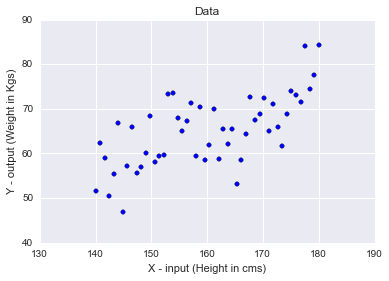

In [9]:
%matplotlib inline
import numpy as np
import scipy.linalg
from math import *
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
#import bayesian_regression_functions as blrf
#------------------------------------------------------------------------------
# Artificially Generated Random Data

x_low = 140
x_high = 180
size = 50
a, s = 1,1
b = 0.4
np.random.seed(123)
X1 = np.linspace(x_low,x_high,size).T
x = X1.reshape(size,1)
t = a + b*X1 + 5*np.random.randn(size)*s

# Plotting the generated data
fig, ax = plt.subplots(1,1,sharex=True)
ax.scatter(X1, t)
ax.set_xlabel('X - input (Height in cms)')
ax.set_ylabel('Y - output (Weight in Kgs)')
ax.set_title('Data')

#### Parameter Distribution
As a Bayesian, our first step would be to define prior probability distributions over the model parameters $\mathbf{w}$. 

Also, for the sake of simplicity, let's treat the noise parameter $\beta$ to be known constant. A conjugate prior for the likelihood function (as defined above) is given by a Gaussian distribution of the form
$$p(\mathbf{w}) = N(\mathbf{w|m_{0},S_{0}})$$ 
where $m_{0}$ is the mean and $S_{0}$ is the covariance.


The prior are defined as below -

(For the sake of analysis, let's assume (believe ! Its all about belief while doing Bayesian analysis) that our paramters have a mean of $0$ and covariance of $1$ for each paramter)

$$\mathbf{w} \sim N(\mathbf{0}, \Sigma_{p} = \alpha^{-1}\mathbf{I})$$

The Posterior distribution over parameter value = w 0


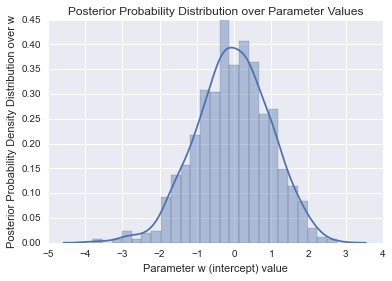

The Posterior distribution over parameter value = w 1


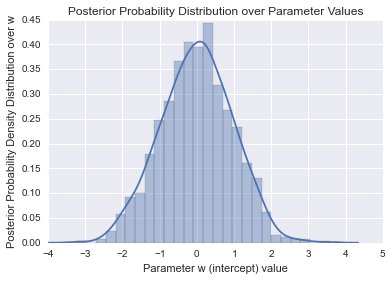

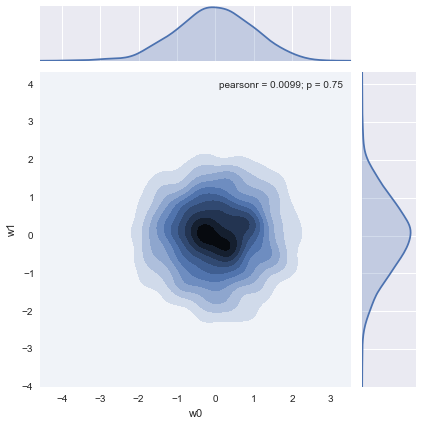

In [10]:
def uniformative_prior(Xn):
    """
    Defining the prior distribution over Parameters
    W = [w1 w2... wn]
    number of features = number of parameter values which we need.
    Prior over w is defined as p(w) = N(mean, covariance_matrix).
    
    :param Xn : Number of features to be used
    """
    
    muN = np.zeros(Xn+1).T # prior_parameter mean
    SNi = np.eye(Xn+1) # prior_parameter covariance matrix
    LNi = scipy.linalg.cholesky(SNi, lower=True)
    return muN, LNi


def blr_sample_gaussian(muN, LNi, n):
    """
    The given functions take samples from the Gaussian distribution of the weigths.
    (Function similiar to sampling from a Gaussian distribution except that
    instead of the Covariance matrix, we use a lower triangular matrix we
    obtain from Cholesky factorization of Covariance matrix)
    
    Inputs :
    
    :param muN :    Mean Vector of the multi Gaussian distribution from which we want the random samples
    :param LNi :    Lower triangular matrix obtained from the Cholesky decomposition of Covariance matrix of the Gaussian distribution
    :n :            Number of random samples we want from the given Gaussian distribution

    Outputs :
    
    :Y : Random samples from the multi-variate Gaussian distribution
           
    """
    dim = muN.shape[0]
    Y = np.ndarray((n, dim))
    for i in xrange(n):
        z = np.random.randn(dim)
        tmp = scipy.linalg.solve_triangular(LNi, z, 'T', True)
        Y[i, :] = muN + tmp
    return Y


muN,LNi = uniformative_prior(1) # Height is the feature (dependent variable) . So, number of features = 1
Y = blr_sample_gaussian(muN, LNi, 1000)

for i in xrange(Y.shape[1]):
        sns.distplot(Y[:,i])
        print 'The Posterior distribution over parameter value = w %d'%i
        plt.xlabel('Parameter w (intercept) value')
        plt.ylabel('Posterior Probability Density Distribution over w')
        plt.title('Posterior Probability Distribution over Parameter Values')
        plt.show()

df = pd.DataFrame(Y, columns=["w0", "w1"])
sns.jointplot(x="w0", y="w1", data=df,kind="kde")

What we are really interested in is the posterior distribution over the parameters, which is proportional to the product of likelihood function and prior distribution (*Bayes rule*). Due to the choice of a conjugate Gaussian prior distribution, the posterior will be Gaussian as well (Makes our life easy! Statisticians love Gaussian!).

We obtain posterior distribution to be in the form,

$$p(\mathbf{w|t}) = N(\mathbf{w|m_{N}, S_{N}})$$

where $\mathbf{m_{N}} = \mathbf{S_{N}}(\mathbf{S_{0}^{-1}m_{0}} + \beta \mathbf{\Phi^{T}t})$ and $\mathbf{S_{N}^{-1}} = \mathbf{S_{0}}^{-1} + \beta \mathbf{\Phi^{T}\Phi}$.

As we know, the posterior distribution is Gaussian. So, the mode of posterior Gaussian distribution coincides with its mean. Hence the maximum posterior weight vector is simply given as $\mathbf{w}_{MAP} = \mathbf{m}_{N}$.

Now, let's see how defining different priors affect the posterior distribution over parameters.

1. If we consider an infinitely broad prior $\mathbf{S_{0}} = \alpha^{-1}\mathbf{I}$ with $\alpha \rightarrow 0$, then the mean of posterior $\mathbf{m}_{N}$ is reduced to maximum likelihood value $\mathbf{w}_{ML}$.

2. If we dont have any data for visualization ie. if $N = 0$, our posterior belief will be the belief we had prior to seeing any data. We dont have any new information, hence our posterior beliefs will coincide with the prior beliefs we had about the data. Furthermore, also note that Bayesian analysis acts as a sequential learning process ie. if data points arrive sequentially, then the posterior distribution at any stage in our analysis acts as the prior distribution for subsequent data point, in such a way, that new posterior distribution is again given by the posterior distribution equation defined above.

3. For Gaussian prior which we have defined above $\mathbf{w} \sim N(\mathbf{0}, \Sigma_{p} = \alpha^{-1}\mathbf{I})$, the corresponding mean and variance of posterior distribution is given as -

$$\mathbf{m_{N}} = \beta \mathbf{S_{N}} \mathbf{\Phi_{T} t}$$
$$\mathbf{S_{N}^{-1}} = \alpha \mathbf{I} + \beta \mathbf{\Phi^{T}\Phi}$$.

Let's have a look at our Weight VS. Height example.

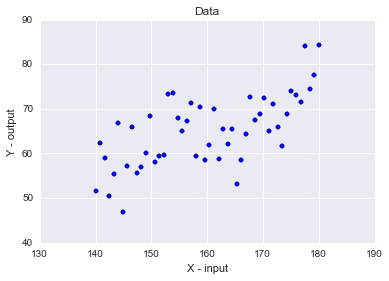

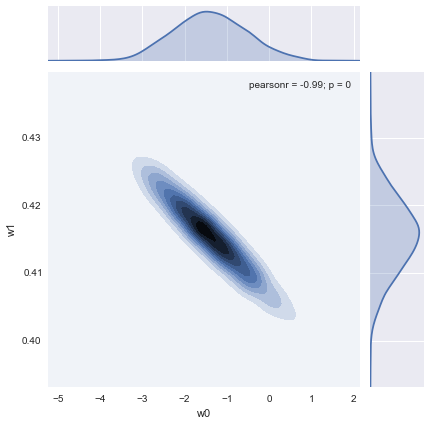

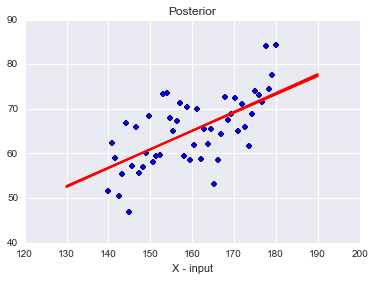

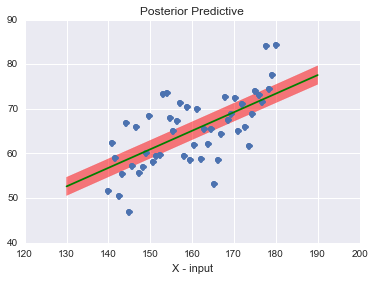

In [12]:
def poly_basis_func(x, n):
    """
    Takes input vector x and
    outputs polynomial basis function matrix Phi with degree n
    
    Inputs:
    
    :param x : input vector x
    :param n : degree for the polynomial basis
    
    Outputs:
    
    :param Phi : Polynomal basis function
    
    """
    
    poly = PolynomialFeatures(degree=n)
    Phi = poly.fit_transform(x)  
    return Phi



            
def sample_multi_gaussian(mu, C, n):
    """
    Samples from a multivariate Gaussian.
    
    Inputs:
    
    :param mu:  The mean vector
    :param C:   The covariance matrix.
    :param n:   Number of samples we want to draw from a multivariate
                Gaussian distribution with mean = mu and covariance matrix = C
    
    Outputs:
    
    :return:    ``n`` number of random samples
                from the multi variate Gaussian distribution.
    """
    dim = mu.shape[0]
    L = np.linalg.cholesky(C)
    Y = np.ndarray((n, dim))
    for i in xrange(n):
        z = np.random.randn(dim)
        Y[i, :] = mu + np.dot(L, z) 
    return Y
 


def blr_train(Phi, t, alpha, beta):
    """
    Computes the predictive mean and the lower Cholesky of covariance for
    Bayesian linear regression using Eq. (3.53-3.54) of Bishop (2006).
    
    Inputs:
    
    :param Phi:     The design matrix.
    :param t:       The targets.
    :param alpha:   The prior precision (inverse covariance) of the regression weights.
    :param beta:    The noise precision.
    
    Output:
    
    :returns:       A tuple whose first element is the predictive mean ``muN``,
                    and its second element in the lower Cholesky of the 
                    inver covariance matrix ``LNi``.
    """
    N = Phi.shape[1]
    SNi = alpha * np.eye(N) + beta * np.dot(Phi.T, Phi)
    LNi = scipy.linalg.cholesky(SNi, lower=True)
    muN = scipy.linalg.cho_solve((LNi, True), beta * np.dot(Phi.T, t))
    
    # cho_solve does this:
    # tmp = scipy.linalg.solve_triangular(LNi, beta * np.dot(Phi.T, t), 'N', True)
    # muN = scipy.linalg.solve_triangular(LNi, tmp, 'T', True)
    return muN, LNi
    
    
def blr_predict(phi, muN, LNi, beta):
    """
    The given function gives us the Predictive mean and covariance which we would be using to make the required predictions.
    
    Inputs:
    
    :param phi  : "Np x M" basis function values
    :param muN  : Mean vector for the posterior distribution over parameter W values
    :param LNi  : Lower triangular matrix obtained from Cholesky factorization of posterior covariance matrix
    :param beta : Gaussian random noise epsilon with zero mean and precision (inverse variance) beta
    
    Outputs:
    
    :param mu       : Mean of posterior predictive distribution
    :param sigma2   : Covariance matrix of Posterior Predictive distributions
    
    """
    n = phi.shape[0]
    mu = np.dot(phi, muN)
    sigma2 = np.ndarray((n,))
    for i in xrange(n):
        tmp = scipy.linalg.solve_triangular(LNi, phi[i, :], 'N', True)
        sigma2[i] = 1. / beta + np.dot(tmp, tmp)
    return mu, sigma2

#******************************************************************************
# Artificially Generated Random Data

size = 50 ## change this !!!

x_low = 140
x_high = 180
a, s = 1,1
b = 0.4
np.random.seed(123)
X1 = np.linspace(x_low,x_high,size).T
x = X1.reshape(size,1)
t = a + b*X1 + 5*np.random.randn(size)*s

degree = 1
fig, ax = plt.subplots(1,1,sharex=True)

#------------------------------------------------------------------------------
# Plotting the generated data

ax.scatter(X1, t)
ax.set_xlabel('X - input')
ax.set_ylabel('Y - output')
ax.set_title('Data')
#plt.show()

#------------------------------------------------------------------------------
if size == 0 :
    muN, LNi = uniformative_prior(degree)
else:
    # Basis to choose
    Phi = poly_basis_func(x,degree)
    # Train the given model
    muN, LNi = blr_train(Phi, t, 1, 1) 

Y = blr_sample_gaussian(muN, LNi, 1000)
df = pd.DataFrame(Y, columns=["w0", "w1"])
sns.jointplot(x="w0", y="w1", data=df,kind="kde")
    
#******************************************************************************
#******************************************************************************


# Fitting the model

size = 300
x_new_low = 130
x_new_high = 190
X1_new = np.linspace(x_new_low,x_new_high,size).T
x_new = X1_new.reshape(size,1)
Phi_new = poly_basis_func(x_new,degree) 

#------------------------------------------------------------------------------
# Posterior and Posterior Predictive Samples
Y = blr_sample_gaussian(muN, LNi, 1000)
mu, sigma2 = blr_predict(Phi_new, muN, LNi, 1)
function_upper = mu + 1.96*sigma2 # upper bound
function_lower = mu - 1.96*sigma2 # lower bound


#------------------------------------------------------------------------------
# Plot the posterior function space
fig, ax = plt.subplots(1,1,sharex=True)
for i in xrange(5):
    #plt.subplot(3, 1, 2)
    ax.plot(X1_new, np.dot(Y[i],Phi_new.T), 'r')
    ax.scatter(X1,t)
    ax.set_xlabel('X - input')
    #ax[1].ylabel('Y - output')
    ax.set_title('Posterior')
    #plt.subplot(3,1,2)


#------------------------------------------------------------------------------

#Plotting the posterior predictive for the new data
fig, ax = plt.subplots(1,1,sharex=True) 
ax.scatter(X1, t)  
ax.plot(X1, t, 'o')
ax.plot(X1_new, mu, 'g')
ax.fill_between(X1_new, function_upper,function_lower,color='r',alpha=.5)
ax.set_xlabel('X - input')
ax.set_title('Posterior Predictive')
fig.subplots_adjust(wspace=0.3, hspace=0.3)
plt.show()








Try changing the size (number) of avaiable data points and look at how it affects the posterior distribution over the parameter $w_{0}$ and $w_{1}$ value. 

We would be obtaining the posterior distribution over parameter values $\mathbf{w}$, for different length of datasets ($n$). Try obtaining results for the following values of size (number of datapoints) variable in the above code - 

1. n = 0 datapoint (what does it represent ? )
2. n = 1 datapoints
3. n = 2 datapoints 
4. n = 20 datapoints
5. n = 100 datapoints
6. n = 500 datapoints

In each case, note that samples drawn from the posterior distribution give  rise to the functions in the red in the third figure, and we see that these functions pass close to all the available data points. In the limit of an infinite number of data points, the posterior distribution would become a delta function centered on the true paramter values.

### Posterior Predictive Distribution

While making predictions in real life, we are rarely interested in knowing the values of parameters $\mathbf{w}$ itself but rather in making predictions $t$ for new values of $\mathbf{x]$. Hence for this purpose, we need to define posterior predictive which is given as -

